In [136]:
from qiskit import *
import numpy as np

In [137]:
matrix = np.zeros((3, 4))
matrix.fill(-1)
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.]])

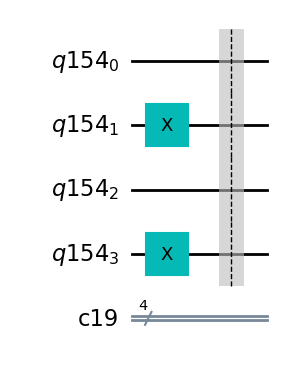

In [138]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

for i in range(1, 4, 2):
    qc.x(qr[i])
qc.barrier()
# update matrix
matrix[2, 1] = 1
matrix[2, 3] = 1
matrix[2, 0] = 0
matrix[2, 2] = 0
qc.draw(output='mpl')

In [139]:
def execution(qc, shots=100):
    job = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots)
    result = job.result()
    print(result.get_counts(qc))

In [140]:
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

In [141]:
matrix[1][0] = 0
matrix

array([[-1., -1., -1., -1.],
       [ 0., -1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

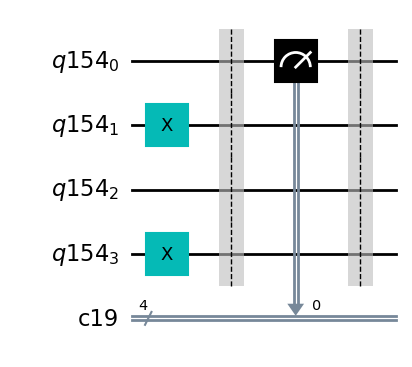

In [142]:
qc.measure(qr[0], cr[0])
qc.barrier()
qc.draw(output='mpl')

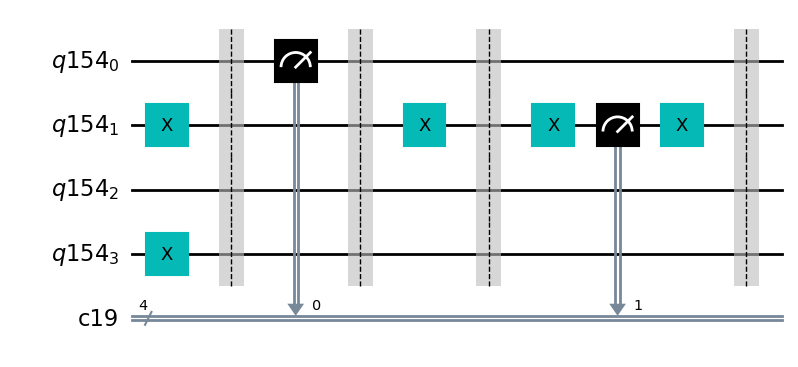

In [143]:
# not gate added by player 1
qc.x(qr[1])
qc.barrier()

# move of player 0
qc.x(qr[1])
qc.measure(qr[1], cr[1])

# remove gate
qc.x(qr[1])

qc.barrier()
qc.draw(output='mpl')

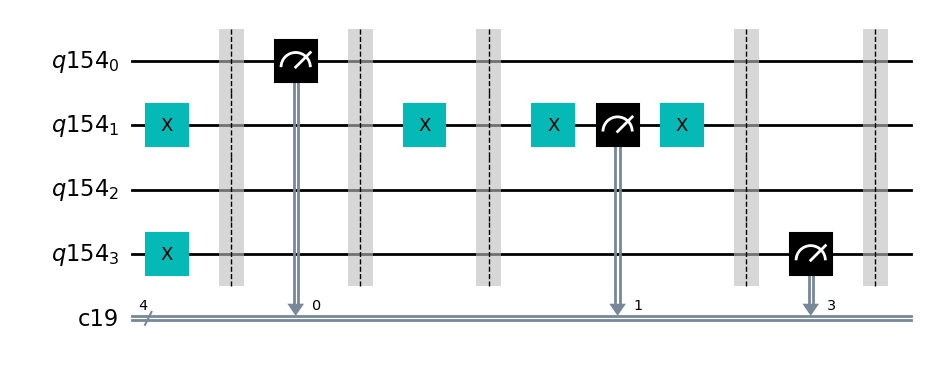

In [144]:
qc.measure(qr[3], cr[3])
qc.barrier()
qc.draw(output='mpl')

In [145]:
# gate applied by player 0
qc.h(qr[0])

# move of player 1
qc.x(qr[0])
qc.measure(qr[0], cr[0])

execution(qc, 1)

{'1010': 1}


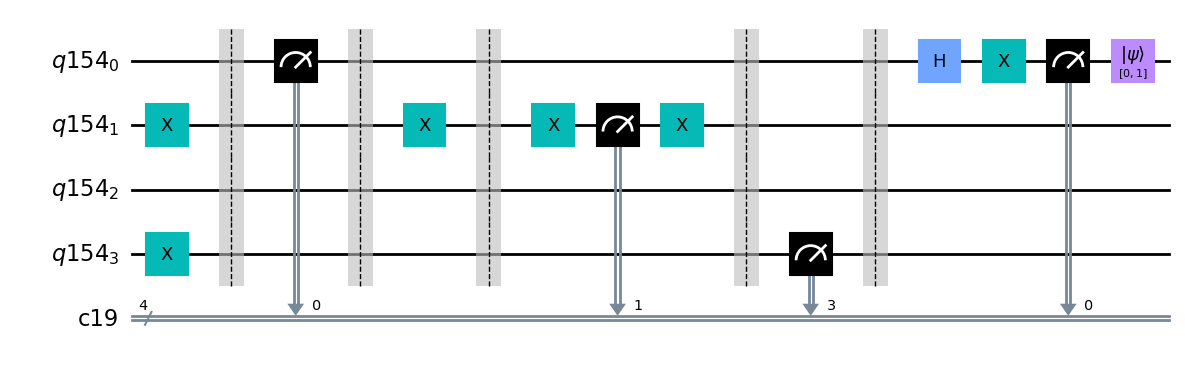

In [146]:
qc.initialize([0, 1], 0)
qc.draw(output='mpl')

In [147]:
qc.measure(qr[0], cr[0])
execution(qc)

{'1011': 100}


{'1110': 100}


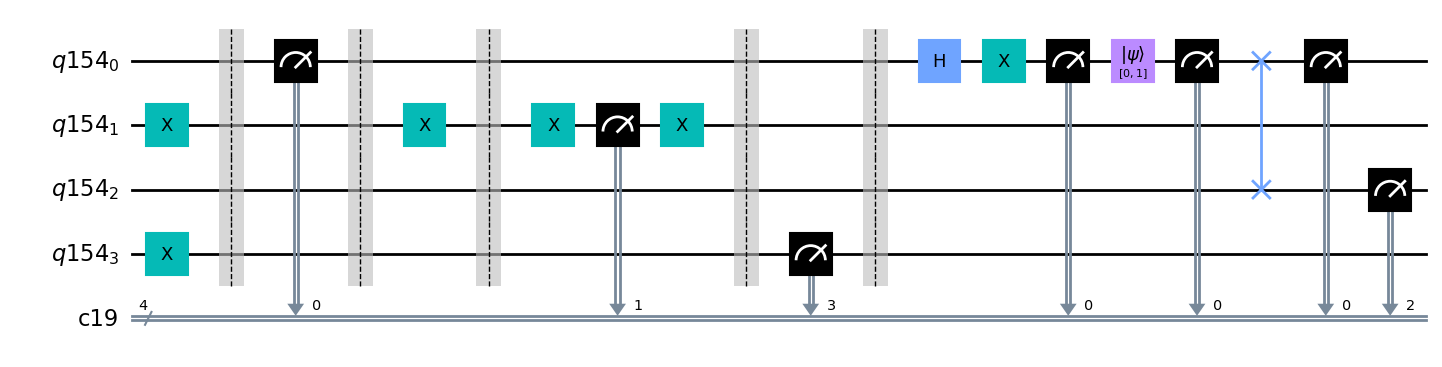

In [148]:
# player 0: swap gate on q0 and q2
qc.swap(qr[0], qr[2])
qc.measure(qr[0], cr[0])
qc.measure(qr[2], cr[2])
execution(qc)
qc.draw(output='mpl')

{'0110': 100}


/home/malhaar/cs/quantum/quantum-connect-4/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


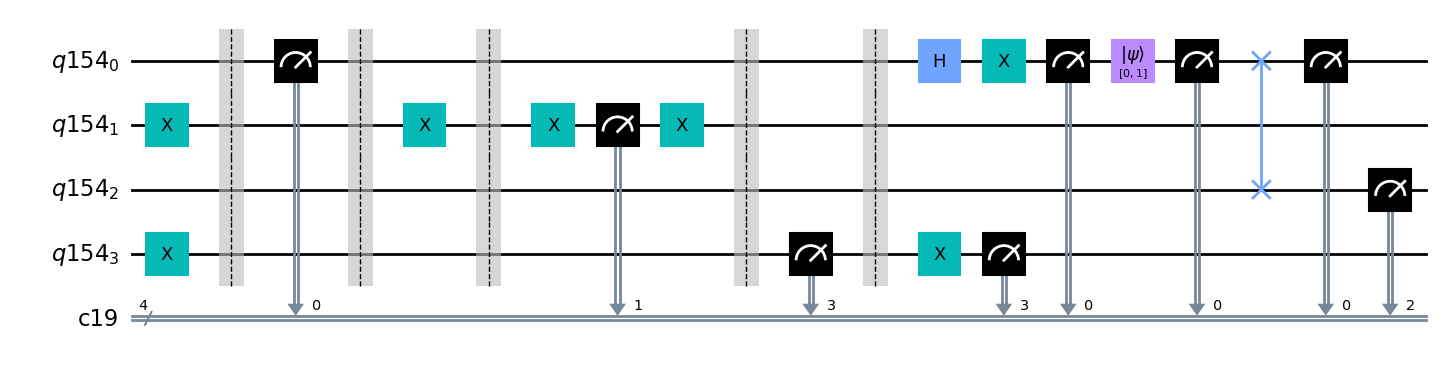

In [150]:
# player 1: rotation gate

# player 0: q0
qc.x(qr[3])
qc.measure(qr[3], cr[3])
execution(qc)
qc.draw(output='mpl')

In [149]:
# qreg = QuantumRegister(1)
# creg = ClassicalRegister(1)
# qc = QuantumCircuit(qreg, creg)

# qc.h(qreg[0])
# qc.measure(qreg[0], creg[0])

# job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
# result = job.result()
# result = result.get_counts(qc)
# print(result)

# # ----------------------------------

# # clear qreg and reinitialize it to |1>
# if list(result.keys())[0] == '0':
#     qc.initialize([1, 0], 0)
# elif list(result.keys())[0] == '1':
#     qc.initialize([0, 1], 0)

# qc.measure(qreg[0], creg[0])
# display(qc.draw(output='mpl'))

# job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
# result = job.result()
# print(result.get_counts(qc))